<a href="https://colab.research.google.com/github/Rajtank22/Group_Lab/blob/main/AQI_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark
!pip install -q handyspark

     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 46.9 MB/s 


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving city_hours.csv to city_hours.csv


In [ ]:
df = spark.read.csv('city_hours.csv',inferSchema=True, header = True)

In [ ]:
df = df.withColumnRenamed(df.columns[2],"PM25")

In [ ]:
df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: double (nullable = true)
 |-- Toluene: double (nullable = true)
 |-- Xylene: double (nullable = true)
 |-- AQI: double (nullable = true)
 |-- AQI_Bucket: string (nullable = true)



In [ ]:
df.show(5)

+---------+-------------------+----+----+----+-----+-----+----+----+------+------+-------+-------+------+----+----------+
|     City|           Datetime|PM25|PM10|  NO|  NO2|  NOx| NH3|  CO|   SO2|    O3|Benzene|Toluene|Xylene| AQI|AQI_Bucket|
+---------+-------------------+----+----+----+-----+-----+----+----+------+------+-------+-------+------+----+----------+
|Ahmedabad|2015-01-01 01:00:00|null|null| 1.0|40.01|36.37|null| 1.0|122.07|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 02:00:00|null|null|0.02|27.75|19.73|null|0.02|  85.9|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 03:00:00|null|null|0.08|19.32|11.08|null|0.08| 52.83|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 04:00:00|null|null| 0.3|16.45|  9.2|null| 0.3| 39.53|153.58|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 05:00:00|null|null|0.12| 14.9| 7.85|null|0.12| 32.63|  null|    0.0|    0.0|   0.0|null|      null|
+---------+-------------

In [ ]:
from pyspark.sql.functions import col
print("City - ",df.filter(col("City").isNull()).count())
print("Pm25 - ",df.filter(col("PM25").isNull()).count())
print("Pm10 - ",df.filter(col("PM10").isNull()).count())
print("No - ",df.filter(col("NO").isNull()).count())
print("NO2 - ",df.filter(col("NO2").isNull()).count())
print("NOx - ",df.filter(col("NOx").isNull()).count())
print("NH3 - ",df.filter(col("NH3").isNull()).count())
print("CO - ",df.filter(col("CO").isNull()).count())
print("SO2 - ",df.filter(col("SO2").isNull()).count())
print("O3 - ",df.filter(col("O3").isNull()).count())
print("Benzene - ",df.filter(col("Benzene").isNull()).count())
print("Toluene - ",df.filter(col("Toluene").isNull()).count())
print("Xylene - ",df.filter(col("Xylene").isNull()).count())
print("AQI - ",df.filter(col("AQI").isNull()).count())
print("AQI_Bucket - ",df.filter(col("AQI_Bucket").isNull()).count())


City -  0
Pm25 -  145088
Pm10 -  296737
No -  116632
NO2 -  117122
NOx -  123224
NH3 -  272542
CO -  86517
SO2 -  130373
O3 -  129208
Benzene -  163646
Toluene -  220607
Xylene -  455829
AQI -  129080
AQI_Bucket -  129080


In [ ]:
df.count()

707875

In [ ]:
### Filling with mean values with an imputer
from pyspark.ml.feature import Imputer
### Create an imputer object
imputer = Imputer(
          inputCols= ['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'],
          outputCols = ["{}".format(c) for c in ['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']]
    ).setStrategy("median")

### Fit imputer on Data Frame and Transform it
df = imputer.fit(df).transform(df)

In [ ]:
df = df.na.drop()

In [ ]:
df.show()

+---------+-------------------+------+----+-----+-----+-----+-----+-----+------+------+-------+-------+------+-----+----------+
|     City|           Datetime|  PM25|PM10|   NO|  NO2|  NOx|  NH3|   CO|   SO2|    O3|Benzene|Toluene|Xylene|  AQI|AQI_Bucket|
+---------+-------------------+------+----+-----+-----+-----+-----+-----+------+------+-------+-------+------+-----+----------+
|Ahmedabad|2015-01-29 09:00:00| 80.47|91.5| 1.42| 21.9|20.65|15.35| 1.42| 32.26| 46.71|    0.0|    0.0|  2.07|288.0|      Poor|
|Ahmedabad|2015-01-29 10:00:00|  87.8|91.5| 2.03|19.87|22.22|15.35| 2.03| 78.95| 21.88|    0.0|    0.0|  2.13|181.0|  Moderate|
|Ahmedabad|2015-01-29 11:00:00| 90.53|91.5| 1.72|20.11|22.12|15.35| 1.72| 95.86| 67.67|    0.0|    0.0|  3.45|182.0|  Moderate|
|Ahmedabad|2015-01-29 12:00:00| 83.53|91.5| 0.75|16.35|16.48|15.35| 0.75| 44.91| 88.92|    0.0|    0.0|  3.25|182.0|  Moderate|
|Ahmedabad|2015-01-29 13:00:00|  68.4|91.5| 0.58|13.73| 12.5|15.35| 0.58| 34.57|116.75|    0.0|    0.0| 

In [ ]:
df.count()

578795

In [ ]:
from pyspark.ml.feature import StringIndexer

df1 = StringIndexer(inputCol="AQI_Bucket", outputCol="AQI_Bucket1")

df1 = df1.fit(df).transform(df)


In [ ]:
df1.show()

+---------+-------------------+------+----+-----+-----+-----+-----+-----+------+------+-------+-------+------+-----+----------+-----------+
|     City|           Datetime|  PM25|PM10|   NO|  NO2|  NOx|  NH3|   CO|   SO2|    O3|Benzene|Toluene|Xylene|  AQI|AQI_Bucket|AQI_Bucket1|
+---------+-------------------+------+----+-----+-----+-----+-----+-----+------+------+-------+-------+------+-----+----------+-----------+
|Ahmedabad|2015-01-29 09:00:00| 80.47|91.5| 1.42| 21.9|20.65|15.35| 1.42| 32.26| 46.71|    0.0|    0.0|  2.07|288.0|      Poor|        2.0|
|Ahmedabad|2015-01-29 10:00:00|  87.8|91.5| 2.03|19.87|22.22|15.35| 2.03| 78.95| 21.88|    0.0|    0.0|  2.13|181.0|  Moderate|        0.0|
|Ahmedabad|2015-01-29 11:00:00| 90.53|91.5| 1.72|20.11|22.12|15.35| 1.72| 95.86| 67.67|    0.0|    0.0|  3.45|182.0|  Moderate|        0.0|
|Ahmedabad|2015-01-29 12:00:00| 83.53|91.5| 0.75|16.35|16.48|15.35| 0.75| 44.91| 88.92|    0.0|    0.0|  3.25|182.0|  Moderate|        0.0|
|Ahmedabad|2015-01-2

In [ ]:
df1 = df1.drop("City","Datetime","AQI_Bucket")

In [ ]:
df1.columns

['PM25',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket1']

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'],outputCol="features")
output = assembler.transform(df1)

finalized_data = output.select("features","AQI_Bucket1")

finalized_data.show()

+--------------------+-----------+
|            features|AQI_Bucket1|
+--------------------+-----------+
|[80.47,91.5,1.42,...|        2.0|
|[87.8,91.5,2.03,1...|        0.0|
|[90.53,91.5,1.72,...|        0.0|
|[83.53,91.5,0.75,...|        0.0|
|[68.4,91.5,0.58,1...|        0.0|
|[67.57,91.5,0.63,...|        0.0|
|[61.13,91.5,0.43,...|        0.0|
|[63.43,91.5,0.45,...|        0.0|
|[54.37,91.5,0.72,...|        0.0|
|[49.2,91.5,0.53,2...|        0.0|
|[67.07,91.5,4.2,4...|        0.0|
|[90.93,91.5,8.07,...|        0.0|
|[100.37,91.5,17.9...|        3.0|
|[112.63,91.5,5.55...|        3.0|
|[93.57,91.5,4.17,...|        3.0|
|[100.0,91.5,4.5,4...|        3.0|
|[89.1,91.5,5.02,4...|        3.0|
|[66.23,91.5,6.63,...|        3.0|
|[78.93,91.5,2.33,...|        3.0|
|[87.77,91.5,2.53,...|        3.0|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
train_data,test_data = finalized_data.randomSplit([0.7,0.3])

**Ridge and Lasso** 

In [ ]:
lr = LogisticRegression(labelCol='AQI_Bucket1', 
                        maxIter=100, 
                        elasticNetParam=0, # Ridge regression is choosen 
                        regParam=0.03)

model = lr.fit(train_data)
predlr = model.transform(test_data)


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='AQI_Bucket1',metricName='accuracy')

print(f"The accuracy of logistic regression is : {evaluator.evaluate(predlr)}")

The accuracy of logistic regression is : 0.6243599206532269


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=predlr.select("prediction").collect()
y_orig=predlr.select("AQI_Bucket1").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[44848 14649     1   129     0     2]
 [ 7757 48876     0    14     0     0]
 [17755   311   211  1738     0    31]
 [ 3902     3  1796 11155     0   453]
 [   54 11424     0     0     0     0]
 [    1     0   416  4706     0  3184]]


Area under ROC Curve: 0.5801
Area under PR Curve: 0.8084


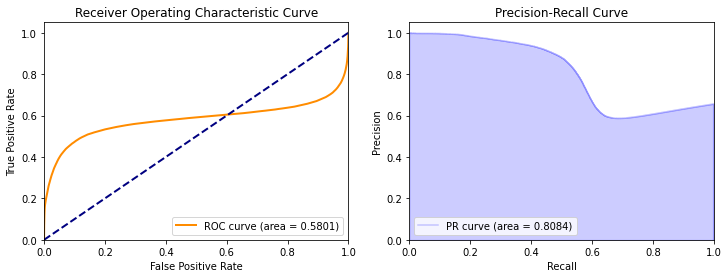

In [ ]:
from handyspark import *
import matplotlib.pyplot as plt


bcm = BinaryClassificationMetrics(predlr, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

**Random Forest**

In [ ]:
from pyspark.ml.classification import LogisticRegression,RandomForestClassifier, GBTClassifier
                    
rf = RandomForestClassifier(labelCol='AQI_Bucket1', 
                           numTrees=100, maxDepth=3)

model = rf.fit(train_data)
pred_rf = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='AQI_Bucket1',metricName='accuracy')
print(f"The accuracy of Random Forest is : {evaluator.evaluate(pred_rf)}")

The accuracy of Random Forest is : 0.7969449185772939


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=pred_rf.select("prediction").collect()
y_orig=pred_rf.select("AQI_Bucket1").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Confusion Matrix:
[[58215  1414     0     0     0     0]
 [    1 56646     0     0     0     0]
 [ 8090     0 10686  1270     0     0]
 [ 3560     0  1093 12656     0     0]
 [    2 11476     0     0     0     0]
 [ 1725     0   592  5990     0     0]]


Area under ROC Curve: 0.6167
Area under PR Curve: 0.8396


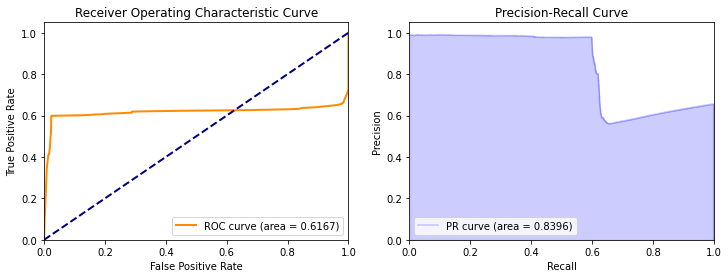

In [ ]:
from handyspark import *
import matplotlib.pyplot as plt


bcm = BinaryClassificationMetrics(pred_rf, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

**Decision Tree**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# train our model using training data
dt = DecisionTreeClassifier(labelCol="AQI_Bucket1", featuresCol="features")
model = dt.fit(train_data)
# test our model and make predictions using testing data
predictions = model.transform(test_data)
predictions.select("prediction", "AQI_Bucket1").show(5)

+----------+-----------+
|prediction|AQI_Bucket1|
+----------+-----------+
|       4.0|        4.0|
|       4.0|        4.0|
|       1.0|        1.0|
|       1.0|        1.0|
|       4.0|        4.0|
+----------+-----------+
only showing top 5 rows



In [ ]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator


multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'AQI_Bucket1', metricName = 'accuracy')
print('Accuracy:', multi_evaluator.evaluate(predictions))

Accuracy: 0.9405072196337132


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("AQI_Bucket1").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Confusion Matrix:
[[57063  2513    53     0     0     0]
 [  316 56331     0     0     0     0]
 [ 1612     0 16162  2272     0     0]
 [    0     0     0 17309     0     0]
 [    0   889     0     0 10589     0]
 [    0     0     0  2662     0  5645]]


Area under ROC Curve: 0.7395
Area under PR Curve: 0.9018


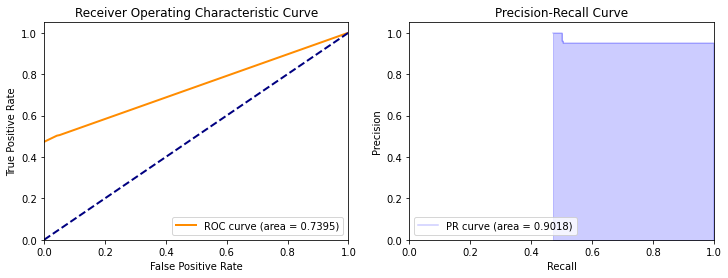

In [ ]:
from handyspark import *
import matplotlib.pyplot as plt

# Creates instance of extended version of BinaryClassificationMetrics
# using a DataFrame and its probability and label columns, as the output
# from the classifier
bcm = BinaryClassificationMetrics(predictions, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

**Pipeline**

In [ ]:
stages = []
#Target column
label_stringIdx = StringIndexer(inputCol = 'AQI_Bucket1', outputCol = 'label')
stages += [label_stringIdx]
#Numeric Columns
numericCols = ['PM25',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']
#Create a vector assembler
assemblerInputs = numericCols 
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features").setHandleInvalid('keep')
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df1)
df2 = pipelineModel.transform(df1)
selectedCols = ['label', 'features'] + ['PM25',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket1']
df2 = df2.select(selectedCols)
df2.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: double (nullable = true)
 |-- Toluene: double (nullable = true)
 |-- Xylene: double (nullable = true)
 |-- AQI: double (nullable = true)
 |-- AQI_Bucket1: double (nullable = false)



In [ ]:
train_data,test_data = df2.randomSplit([0.7,0.3],seed = 2018)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# train our model using training data
pl_dt = DecisionTreeClassifier(labelCol="AQI_Bucket1", featuresCol="features")
pl_model = pl_dt.fit(train_data)
# test our model and make predictions using testing data
pl_predictions = pl_model.transform(test_data)
pl_predictions.select("prediction", "AQI_Bucket1").show(5)

+----------+-----------+
|prediction|AQI_Bucket1|
+----------+-----------+
|       0.0|        0.0|
|       0.0|        0.0|
|       0.0|        0.0|
|       0.0|        0.0|
|       0.0|        0.0|
+----------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'AQI_Bucket1', metricName = 'accuracy')
print('Accuracy:', multi_evaluator.evaluate(pl_predictions))

Accuracy: 0.9471600846911534


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=pl_predictions.select("prediction").collect()
y_orig=pl_predictions.select("AQI_Bucket1").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Confusion Matrix:
[[58133  1394     0     0     0     0]
 [    0 57017     0     0     0     0]
 [ 2277     0 15526  2233     0     0]
 [    0     0     0 17218     0     0]
 [    0   916     0     0 10817     0]
 [    0     0     0  2364     0  5913]]


Area under ROC Curve: 0.7418
Area under PR Curve: 0.8979


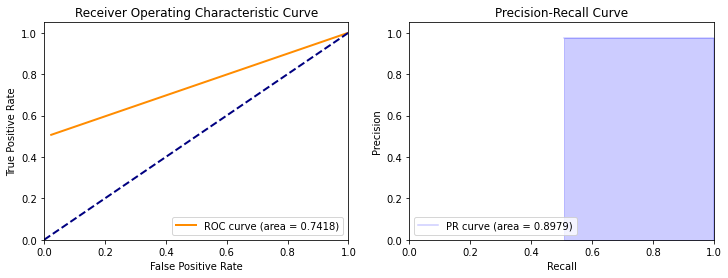

In [ ]:
from handyspark import *
import matplotlib.pyplot as plt

# Creates instance of extended version of BinaryClassificationMetrics
# using a DataFrame and its probability and label columns, as the output
# from the classifier
bcm = BinaryClassificationMetrics(pl_predictions, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

**Hyper parameter Tunning**

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np
from pyspark.ml.tuning import CrossValidator


paramGrid_rf = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [int(x) for x in np.arange(10,11,10)]) \
    .addGrid(dt.impurity, [x for x in ['gini','entropy']]) \
    .addGrid(dt.maxBins, [int(x) for x in np.arange(22, 42, 10)]) \
    .build()
evaluator = BinaryClassificationEvaluator()
ds_crossval = CrossValidator(estimator=pl_dt,
                          estimatorParamMaps=paramGrid_rf,
                          evaluator=evaluator,
                          numFolds=3)
ds_cvModel = ds_crossval.fit(train_data)
predictions_ds_cv = ds_cvModel.transform(test_data)

Area under ROC Curve: 0.7418
Area under PR Curve: 0.8979


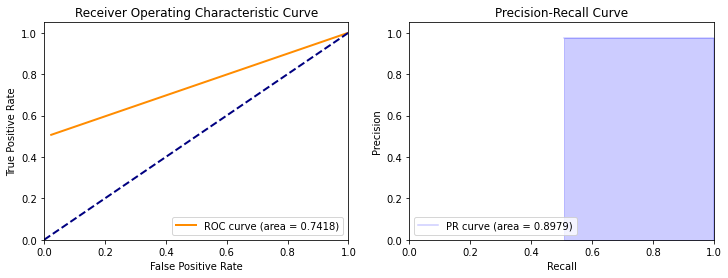

In [ ]:
bcm = BinaryClassificationMetrics(predictions_ds_cv, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

**Naive Bayes**

In [ ]:
train_data,test_data = finalized_data.randomSplit([0.7,0.3],seed=123)

In [ ]:
from pyspark.ml.classification import NaiveBayes 

nb = NaiveBayes(labelCol="AQI_Bucket1", featuresCol="features",modelType="multinomial")

In [ ]:
model_nb = nb.fit(train_data)
# test our model and make predictions using testing data
predictions_nb = model_nb.transform(test_data)
predictions_nb.select("prediction", "AQI_Bucket1").show(5)

+----------+-----------+
|prediction|AQI_Bucket1|
+----------+-----------+
|       1.0|        0.0|
|       4.0|        4.0|
|       5.0|        2.0|
|       1.0|        4.0|
|       1.0|        1.0|
+----------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'AQI_Bucket1', metricName = 'accuracy')
print('Accuracy:', multi_evaluator.evaluate(predictions_nb))

Accuracy: 0.39183205138554145


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=predictions_nb.select("prediction").collect()
y_orig=predictions_nb.select("AQI_Bucket1").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Confusion Matrix:
[[23471 13241 11404  5651  4684  1525]
 [20721 23114  2896  2133  7206   649]
 [ 4355  1188  6169  5248   557  2448]
 [ 1563   249  3572  6791   127  4657]
 [ 2347  5334    86   163  3600    16]
 [  375    47   992  2034     9  4812]]


Area under ROC Curve: 0.4642
Area under PR Curve: 0.6357


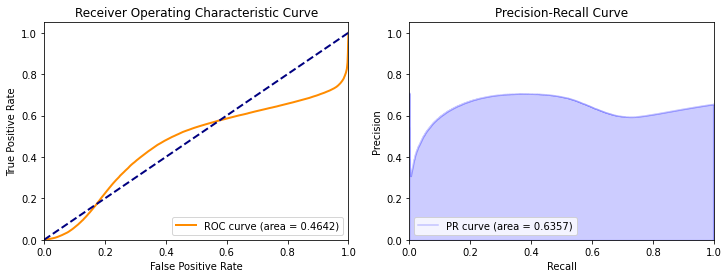

In [ ]:
from handyspark import *
import matplotlib.pyplot as plt

# Creates instance of extended version of BinaryClassificationMetrics
# using a DataFrame and its probability and label columns, as the output
# from the classifier
bcm = BinaryClassificationMetrics(predictions_nb, scoreCol='probability', labelCol='AQI_Bucket1')
# Get metrics from evaluator
print("Area under ROC Curve: {:.4f}".format(bcm.areaUnderROC))
print("Area under PR Curve: {:.4f}".format(bcm.areaUnderPR))
# Plot both ROC and PR curves
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])